In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [37]:
student_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_data.csv')

In [59]:
student_df

,id,first_name,last_name,date_of_birth,ethnicity,gender,status,entry_academic_period,exclusion_type,act_composite,...,hs_gpa,hs_city,hs_state,hs_zip,email,entry_age,ged,english_2nd_language,first_generation,birth_year
0,111111.0,JOHN,DOE,NaT,hispanic,M,FT,2008,,NaN,...,2.71,ALBUQUERQUE,NEW MEXICO,NaN,JDOE@EXAMPLE.COM,17,False,False,True,NaN
1,111112.0,JANE,SMITH,NaT,hispanic,F,TRANSFER,2006,,NaN,...,3.73,NEW YORK,NEW YORK,NaN,JSMITH@EXAMPLE.COM,18,False,False,True,NaN
2,111113.0,SARAH,THOMAS,NaT,hispanic,M,FTFT,2006,,14.0,...,2.64,PHEONIX,ARIZONA,NaN,STHOMAS@EXAMPLE.COM,17,False,False,False,NaN
3,111114.0,FRANK,BROWN,NaT,race/ethnicity unknown,M,FTFT,2006,,NaN,...,3.68,PHEONIX,ARIZONA,NaN,FBROWN@EXAMPLE.COM,19,True,False,True,NaN
4,111115.0,MIKE,DAVIS,NaT,white,F,FTFT,2007,,22.0,...,3.46,SEATTLE,WASHINGTON,NaN,MDAVIS@EXAMPLE.COM,18,False,True,False,NaN
5,111116.0,JENNIFER,WILSON,NaT,asian,M,TRANSFER,2006,,NaN,...,4.24,DENVER,COLORADO,NaN,JWILSON@EXAMPLE.COM,18,True,False,True,NaN
6,111117.0,JESSICA,GARCIA,NaT,white,F,FTFT,2007,,25.0,...,,AUSTIN,TEXAS,NaN,JGARCIA@EXAMPLE.COM,18,False,False,False,NaN
7,111118.0,FRED,CLARK,NaT,hispanic,F,FTGRAD,2010,,21.0,...,2.54,DENVER,COLORADO,NaN,FCLARK@EXAMPLE.COM,19,False,True,True,NaN
8,111119.0,BOB,LOPEZ,1998-04-01,white,F,FTFT,2007,,15.0,...,3.24,DENVER,COLORADO,NaN,BLOPEZ@EXAMPLE.COM,18,False,False,True,1998.0
9,111120.0,EMILY,JOHNSON,NaT,white,F,FT,2021,,NaN,...,3.89,LOS ANGELES,CALIFORNIA,NaN,EMILY@EXAMPLE.COM,18,False,False,True,NaN


In [9]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42 non-null     float64
 1   first_name             42 non-null     object 
 2   last_name              42 non-null     object 
 3   date_of_birth          42 non-null     object 
 4   ethnicity              42 non-null     object 
 5   gender                 42 non-null     object 
 6   status                 42 non-null     object 
 7   entry_academic_period  42 non-null     object 
 8   exclusion_type         13 non-null     float64
 9   act_composite          33 non-null     float64
 10  act_math               33 non-null     float64
 11  act_english            34 non-null     object 
 12  act_reading            11 non-null     float64
 13  sat_combined           12 non-null     float64
 14  sat_math               12 non-null     float64
 15  sat_verb

In [39]:
# Convert date_of_birth to datetime format
student_df['date_of_birth'] = pd.to_datetime(student_df['date_of_birth'], errors='coerce')

In [40]:
# Convert entry_academic_period to a consistent format (e.g., Fall 2008 -> 2008)
student_df['entry_academic_period'] = student_df['entry_academic_period'].str.extract('(\d{4})')

In [41]:
# Convert ethnicity to lowercase for consistency
student_df['ethnicity'] = student_df['ethnicity'].str.lower()

In [42]:
# Handle missing values
student_df.fillna(value='', inplace=True)


In [43]:
# Convert all strings in columns to uppercase
string_columns = ['first_name', 'last_name', 'hs_city', 'hs_state', 'hs_zip', 'email']
student_df[string_columns] = student_df[string_columns].apply(lambda x: x.str.upper())

In [44]:
# Convert 'date_of_birth' to year
student_df['birth_year'] = student_df['date_of_birth'].dt.year

In [45]:
# Handle inconsistent gender values
student_df['gender'] = student_df['gender'].apply(lambda x: 'M' if x.upper() == 'M' else 'F' if x.upper() == 'F' else '')

In [47]:
# Convert 'status' to uppercase
student_df['status'] = student_df['status'].str.upper()

In [48]:
# Convert 'exclusion_type' to uppercase
student_df['exclusion_type'] = student_df['exclusion_type'].str.upper()

In [50]:
# Remove non-numeric characters from SAT and ACT scores
score_columns = ['act_composite', 'act_math', 'act_english', 'act_reading', 'sat_combined', 'sat_math', 'sat_verbal', 'sat_reading']
student_df[score_columns] = student_df[score_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [52]:

# Handle English 2nd language and first generation columns
student_df['english_2nd_language'] = student_df['english_2nd_language'].apply(lambda x: True if str(x).upper() == 'TRUE' else False)
student_df['first_generation'] = student_df['first_generation'].apply(lambda x: True if str(x).upper() == 'TRUE' else False)


In [55]:
student_df = student_df[:42]

In [57]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     42 non-null     object        
 1   first_name             42 non-null     object        
 2   last_name              42 non-null     object        
 3   date_of_birth          1 non-null      datetime64[ns]
 4   ethnicity              42 non-null     object        
 5   gender                 42 non-null     object        
 6   status                 42 non-null     object        
 7   entry_academic_period  42 non-null     object        
 8   exclusion_type         29 non-null     object        
 9   act_composite          33 non-null     float64       
 10  act_math               33 non-null     float64       
 11  act_english            33 non-null     float64       
 12  act_reading            11 non-null     float64       
 13  sat_com

In [58]:
student_df["entry_age"] = student_df["entry_age"].astype(int)

<ipython-input-58-bfbe4131300d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_df["entry_age"] = student_df["entry_age"].astype(int)


In [63]:
student_df.columns


Index(['id', 'first_name', 'last_name', 'date_of_birth', 'ethnicity', 'gender',
       'status', 'entry_academic_period', 'exclusion_type', 'act_composite',
       'act_math', 'act_english', 'act_reading', 'sat_combined', 'sat_math',
       'sat_verbal', 'sat_reading', 'hs_gpa', 'hs_city', 'hs_state', 'hs_zip',
       'email', 'entry_age', 'ged', 'english_2nd_language', 'first_generation',
       'birth_year'],
      dtype='object')

In [64]:
drop_cols = ['date_of_birth','exclusion_type', 'act_composite',
       'act_math', 'act_english', 'act_reading', 'sat_combined', 'sat_math',
       'sat_verbal', 'sat_reading', 'hs_zip','birth_year']

In [67]:
student_df = student_df.drop(drop_cols, 'columns')

<ipython-input-67-1c743e029920>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  student_df = student_df.drop(drop_cols, 'columns')


In [68]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     42 non-null     object
 1   first_name             42 non-null     object
 2   last_name              42 non-null     object
 3   ethnicity              42 non-null     object
 4   gender                 42 non-null     object
 5   status                 42 non-null     object
 6   entry_academic_period  42 non-null     object
 7   hs_gpa                 42 non-null     object
 8   hs_city                42 non-null     object
 9   hs_state               42 non-null     object
 10  email                  42 non-null     object
 11  entry_age              42 non-null     int64 
 12  ged                    42 non-null     object
 13  english_2nd_language   42 non-null     bool  
 14  first_generation       42 non-null     bool  
dtypes: bool(2), int64(1), obj

In [70]:
# Calculate basic statistics
summary_stats = student_df.describe()
summary_stats

,entry_age
count,42.000000
mean,18.000000
std,0.584349
min,17.000000
25%,18.000000
50%,18.000000
75%,18.000000
max,19.000000


In [71]:
# Calculate the distribution of gender
gender_distribution = student_df['gender'].value_counts()
gender_distribution

F    22
M    20
Name: gender, dtype: int64

In [72]:
# Calculate the average entry age
average_entry_age = student_df['entry_age'].mean()
average_entry_age

18.0

In [73]:

# Calculate the correlation matrix
correlation_matrix = student_df.corr()
correlation_matrix

<ipython-input-73-b7e93b5960d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = student_df.corr()


,entry_age,english_2nd_language,first_generation
entry_age,1.000000,-0.096825,0.168034
english_2nd_language,-0.096825,1.000000,-0.347089
first_generation,0.168034,-0.347089,1.000000


<Axes: >

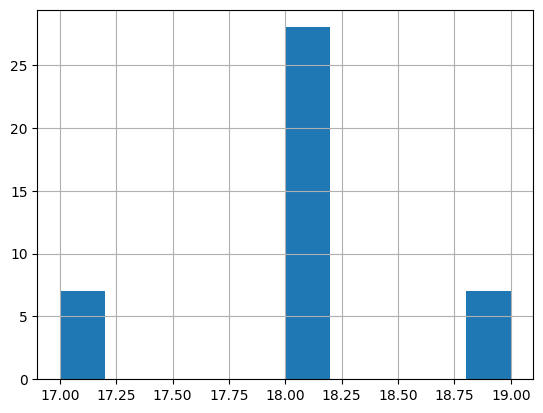

In [90]:
student_df['entry_age'].hist()

<Axes: >

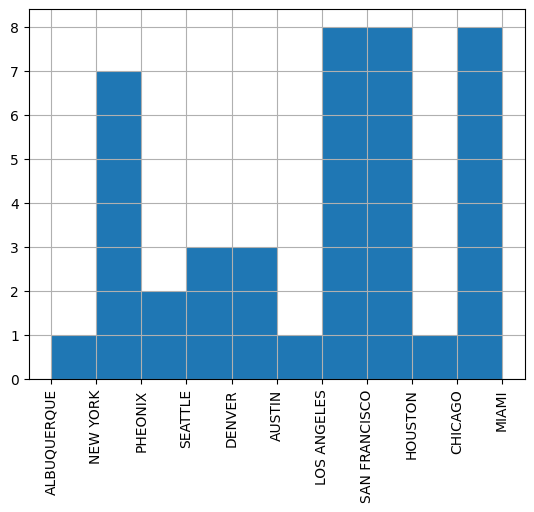

In [87]:
student_df['hs_city'].hist(xrot =)

<Axes: ylabel='ethnicity'>

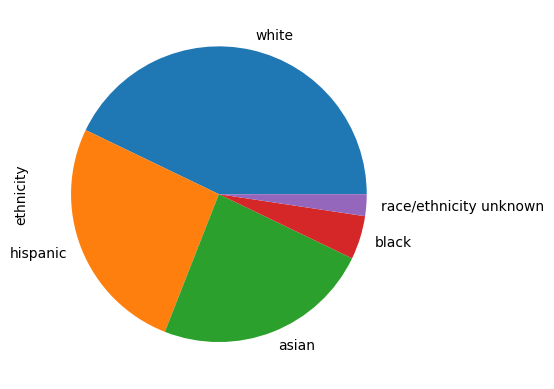

In [92]:
student_df['ethnicity'].value_counts().plot(kind='pie')